In [2]:
# Data Preprocessing
# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sn

from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("CPET_post_EDA.csv")
df

,Class,sex,age,BMI,MaxVO2_EST,MaxO2_EST,PredictedMaxHR,PeakHeartRate,MeanHeartRate,MinHeartRate,...,75_to_100_VESlope,75_to_100_RERSlope,75_to_100_RRSlope,75_to_100_O2Slope,75_to_100_VEVCO2Slope,75_to_100_VEVO2Slope,VTTime,VO2atVT,PercentTimeAfterVT,VO2vsPeakVO2atVT
0,CardiacLim,F,40,35.915381,2.319521,0.010556,180.0,142,100.290323,68,...,5.154882,0.063604,2.407089,0.315476,-0.153480,1.433403,14.5,1.649219,0.935484,0.711017
1,CardiacLim,M,69,35.057157,2.657210,0.013601,159.7,156,110.653846,70,...,8.354307,0.072662,2.197299,0.002014,1.749612,4.111349,11.5,1.384651,0.884615,0.521092
2,Healthy,F,16,19.135218,1.444581,0.010300,196.8,200,150.666667,70,...,9.395010,0.067916,3.033109,0.419901,-0.109887,1.682275,13.0,2.935024,0.866667,2.031748
3,Healthy,M,17,19.358400,2.293821,0.015833,196.1,196,149.709677,73,...,12.969552,0.043825,1.991049,0.827986,-0.355533,1.043862,12.0,3.601732,0.774194,1.570189
4,Healthy,F,15,20.582507,1.933529,0.010300,197.5,192,152.818182,85,...,0.925781,0.039283,5.233381,-0.530085,-0.220191,0.907466,7.5,2.695731,0.681818,1.394202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,MuscleSkeletalLim,M,55,32.647091,2.664873,0.014567,169.5,116,98.714286,81,...,-3.645716,0.004893,-0.044359,-0.464362,-2.094273,-1.425434,-1.0,-1.000000,0.000000,-0.375252
213,MuscleSkeletalLim,M,66,30.834801,2.371165,0.013601,161.8,100,76.750000,66,...,7.538376,0.114840,4.819715,0.711698,-2.841259,1.935547,-1.0,-1.000000,0.000000,-0.421734
214,MuscleSkeletalLim,F,65,36.729098,1.901766,0.010926,162.5,142,111.071429,62,...,3.617017,0.020187,1.792170,0.469709,-0.337686,0.277564,10.5,1.173651,0.750000,0.617137
215,MuscleSkeletalLim,M,83,21.075915,1.736197,0.014301,149.9,78,63.823529,48,...,1.376028,0.053272,0.715205,-0.279434,-0.881182,1.345763,-1.0,-1.000000,0.000000,-0.575971


In [4]:
class_group = df.groupby("Class")

class_group_size = class_group.size()
class_group_size

Class
CardiacLim           51
Healthy              95
MuscleSkeletalLim    45
PulmonaryLim         26
dtype: int64

In [5]:
categorical_cols = df.columns
categorical_cols

Index(['Class', 'sex', 'age', 'BMI', 'MaxVO2_EST', 'MaxO2_EST',
       'PredictedMaxHR', 'PeakHeartRate', 'MeanHeartRate', 'MinHeartRate',
       ...
       '75_to_100_VESlope', '75_to_100_RERSlope', '75_to_100_RRSlope',
       '75_to_100_O2Slope', '75_to_100_VEVCO2Slope', '75_to_100_VEVO2Slope',
       'VTTime', 'VO2atVT', 'PercentTimeAfterVT', 'VO2vsPeakVO2atVT'],
      dtype='object', length=110)

In [6]:
# Recoding categorical columns

number = LabelEncoder()

for col in categorical_cols:
    df[col] = number.fit_transform(df[col].astype(str))
    
df

,Class,sex,age,BMI,MaxVO2_EST,MaxO2_EST,PredictedMaxHR,PeakHeartRate,MeanHeartRate,MinHeartRate,...,75_to_100_VESlope,75_to_100_RERSlope,75_to_100_RRSlope,75_to_100_O2Slope,75_to_100_VEVCO2Slope,75_to_100_VEVO2Slope,VTTime,VO2atVT,PercentTimeAfterVT,VO2vsPeakVO2atVT
0,0,0,19,183,120,5,43,33,3,44,...,128,158,76,135,7,58,10,83,85,148
1,0,1,48,180,151,9,14,46,45,46,...,190,172,65,49,163,181,4,57,78,103
2,1,0,1,5,14,4,61,82,143,46,...,210,166,109,159,6,73,7,132,75,215
3,1,1,2,7,112,16,60,80,142,49,...,47,103,51,199,19,35,5,137,54,214
4,1,0,0,17,69,4,62,77,146,60,...,8,88,176,42,10,30,23,126,31,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2,1,34,164,152,11,28,13,206,57,...,3,8,1,40,33,9,0,0,0,9
213,2,1,45,139,126,9,17,0,155,42,...,177,208,173,193,36,90,0,0,0,17
214,2,0,44,188,61,8,18,33,47,38,...,96,25,48,168,15,19,2,38,47,128
215,2,1,60,24,45,10,2,84,149,27,...,11,133,21,35,26,50,0,0,0,40


In [12]:
class_group = df.groupby("Class")

class_group_size = class_group.size()
class_group_size


# 0 - CardiacLim
# 1 - Healthy
# 2 - MuscleSkeletalLim
# 3 - PulmonaryLim

Class
0    51
1    95
2    45
3    26
dtype: int64

In [7]:
# Scaling the columns

orig_cols = list(df.columns)

transform = StandardScaler()

df_transformed = transform.fit_transform(df)

df_transformed = pd.DataFrame(df_transformed)

df_transformed.columns = orig_cols

df_transformed["Class"] = df["Class"]

df = df_transformed

df

,Class,sex,age,BMI,MaxVO2_EST,MaxO2_EST,PredictedMaxHR,PeakHeartRate,MeanHeartRate,MinHeartRate,...,75_to_100_VESlope,75_to_100_RERSlope,75_to_100_RRSlope,75_to_100_O2Slope,75_to_100_VEVCO2Slope,75_to_100_VEVO2Slope,VTTime,VO2atVT,PercentTimeAfterVT,VO2vsPeakVO2atVT
0,0,-1.375984,-1.100080,1.375565,0.348192,-1.127342,1.100080,-0.532791,-1.663670,0.074906,...,0.319275,0.798189,-0.364931,0.431022,-1.613523,-0.741731,0.070012,0.772360,1.814990,0.654429
1,0,0.726752,0.990770,1.325520,0.889511,-0.184632,-0.990770,0.013557,-0.977234,0.188974,...,1.309029,1.021681,-0.559327,-0.941863,1.231171,1.364839,-0.545903,0.189396,1.564743,-0.066439
2,1,-1.375984,-2.397849,-1.593730,-1.502770,-1.363020,2.397849,1.526519,0.624451,0.188974,...,1.628305,0.925899,0.218258,0.814152,-1.631758,-0.484832,-0.237946,1.871022,1.457495,1.727722
3,1,0.726752,-2.325750,-1.560367,0.208497,1.465110,2.325750,1.442466,0.608107,0.360075,...,-0.973790,-0.079819,-0.806740,1.452703,-1.394700,-1.135643,-0.443251,1.983131,0.706754,1.711702
4,1,-1.375984,-2.469947,-1.393553,-0.542365,-1.363020,2.469947,1.316386,0.673482,0.987447,...,-1.596377,-0.319275,1.402308,-1.053609,-1.558817,-1.221276,1.404494,1.736492,-0.115486,1.679664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2,0.726752,-0.018606,1.058617,0.906973,0.286723,0.018606,-1.373325,1.654105,0.816345,...,-1.676196,-1.596377,-1.690360,-1.085536,-1.139407,-1.580934,-0.956513,-1.088640,-1.223722,-1.572253
213,2,0.726752,0.774475,0.641582,0.452963,-0.184632,-0.774475,-1.919673,0.820575,-0.039161,...,1.101500,1.596377,1.349291,1.356921,-1.084701,-0.193680,-0.956513,-1.088640,-1.223722,-1.444099
214,2,-1.375984,0.702377,1.458972,-0.682061,-0.420310,-0.702377,-0.532791,-0.944546,-0.267297,...,-0.191565,-1.324993,-0.859757,0.957826,-1.467641,-1.409668,-0.751208,-0.236616,0.456507,0.334043
215,2,0.726752,1.855949,-1.276783,-0.961451,0.051045,-1.855949,1.610573,0.722513,-0.894668,...,-1.548486,0.399094,-1.336912,-1.165355,-1.267053,-0.878744,-0.956513,-1.088640,-1.223722,-1.075655


In [8]:
# Feature Selection

    # Selecting features whose correlation with class > 0.2
target = "Class"
corr_threshold = 0.2

cor = df.corr()
cor_target = abs(cor[target])
relevant_features = cor_target[cor_target >= corr_threshold]

corr_columns_obj = relevant_features.index
corr_columns_list = []

for col in corr_columns_obj:
    corr_columns_list.append(col)
        
corr_columns_list

['Class',
 'LowestVE/VCO2',
 'PeakVE/VCO2',
 'MeanVE/VCO2',
 'DiffPercentPeakVO2',
 'MeanVO2',
 'MeanVCO2',
 'PeakVCO2',
 'MeanO2Pulse',
 'MaxO2Pulse',
 'O2PulsePercent',
 'second_half_VESlope',
 '0_to_25_VO2Slope',
 '0_to_25_HRSlope',
 '0_to_25_O2Slope',
 '75_to_100_VESlope']

In [9]:
# Dataframes with only the selected columns

df = df[corr_columns_list].copy()
df

,Class,LowestVE/VCO2,PeakVE/VCO2,MeanVE/VCO2,DiffPercentPeakVO2,MeanVO2,MeanVCO2,PeakVCO2,MeanO2Pulse,MaxO2Pulse,O2PulsePercent,second_half_VESlope,0_to_25_VO2Slope,0_to_25_HRSlope,0_to_25_O2Slope,75_to_100_VESlope
0,0,-1.437322,1.533367,-0.147972,-0.022886,-0.399094,-0.682272,-0.072394,-0.383131,0.189349,0.941863,-0.383131,-0.300556,0.592106,-0.095783,0.319275
1,0,-0.079235,1.232517,-0.293120,-0.697917,-0.111746,-0.376875,-0.299815,-0.415058,-0.612227,-0.686442,0.670478,-0.267041,0.455812,-0.079819,1.309029
2,1,-0.617345,0.876966,-0.422140,1.728980,1.436739,1.423357,1.519551,0.957826,1.103147,1.564450,0.941863,0.520567,-0.517723,0.015964,1.628305
3,1,-0.053610,-0.052936,-0.067334,1.712908,1.676196,1.680533,1.711983,1.548486,1.552029,1.452703,-1.197283,1.727116,-0.167251,1.532522,-0.973790
4,1,-0.309853,0.439365,-0.212482,1.680764,1.484631,1.551945,1.432081,1.117464,1.247430,1.596377,1.340957,0.805447,1.760348,0.526804,-1.596377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2,0.766367,-0.463186,0.513257,-1.003288,-0.638551,-0.730492,-1.087040,-0.638551,0.093160,-0.335239,-0.638551,-1.071406,-1.549670,-0.957826,-1.676196
213,2,0.996986,0.275265,1.077720,-1.485453,-1.293065,-1.502021,-1.366943,-0.750297,-0.676353,-0.734333,-0.367167,-1.037891,-1.101844,-0.846080,1.101500
214,2,0.253881,-0.928137,-0.486650,0.057475,-0.159638,-0.135773,-0.387284,-0.399094,-0.435880,0.191565,-1.053609,-0.535163,-1.101844,-0.223493,-0.191565
215,2,1.227604,1.423967,1.448654,-1.437237,-1.484631,-1.566315,-1.559375,-0.462949,-0.788574,-0.989754,-1.612341,-0.149737,-0.965549,0.446986,-1.548486


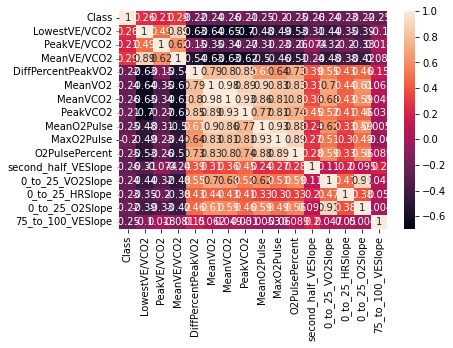

In [11]:
# Relationships of variables

corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [10]:
# Exporting dataframe into CSV

df.to_csv('CPET_processed.csv', index=False)
df

,Class,LowestVE/VCO2,PeakVE/VCO2,MeanVE/VCO2,DiffPercentPeakVO2,MeanVO2,MeanVCO2,PeakVCO2,MeanO2Pulse,MaxO2Pulse,O2PulsePercent,second_half_VESlope,0_to_25_VO2Slope,0_to_25_HRSlope,0_to_25_O2Slope,75_to_100_VESlope
0,0,-1.437322,1.533367,-0.147972,-0.022886,-0.399094,-0.682272,-0.072394,-0.383131,0.189349,0.941863,-0.383131,-0.300556,0.592106,-0.095783,0.319275
1,0,-0.079235,1.232517,-0.293120,-0.697917,-0.111746,-0.376875,-0.299815,-0.415058,-0.612227,-0.686442,0.670478,-0.267041,0.455812,-0.079819,1.309029
2,1,-0.617345,0.876966,-0.422140,1.728980,1.436739,1.423357,1.519551,0.957826,1.103147,1.564450,0.941863,0.520567,-0.517723,0.015964,1.628305
3,1,-0.053610,-0.052936,-0.067334,1.712908,1.676196,1.680533,1.711983,1.548486,1.552029,1.452703,-1.197283,1.727116,-0.167251,1.532522,-0.973790
4,1,-0.309853,0.439365,-0.212482,1.680764,1.484631,1.551945,1.432081,1.117464,1.247430,1.596377,1.340957,0.805447,1.760348,0.526804,-1.596377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2,0.766367,-0.463186,0.513257,-1.003288,-0.638551,-0.730492,-1.087040,-0.638551,0.093160,-0.335239,-0.638551,-1.071406,-1.549670,-0.957826,-1.676196
213,2,0.996986,0.275265,1.077720,-1.485453,-1.293065,-1.502021,-1.366943,-0.750297,-0.676353,-0.734333,-0.367167,-1.037891,-1.101844,-0.846080,1.101500
214,2,0.253881,-0.928137,-0.486650,0.057475,-0.159638,-0.135773,-0.387284,-0.399094,-0.435880,0.191565,-1.053609,-0.535163,-1.101844,-0.223493,-0.191565
215,2,1.227604,1.423967,1.448654,-1.437237,-1.484631,-1.566315,-1.559375,-0.462949,-0.788574,-0.989754,-1.612341,-0.149737,-0.965549,0.446986,-1.548486
